> When I want to graph the spread of a metric. Useful for visualizing bootstrapped results too.

In [1]:
import numpy as np
import pandas as pd
import os
from IPython.display import display, Image
import plotly.graph_objs as go

In [2]:
churn = pd.read_csv('../data/histogram-1.csv')
non_churn = pd.read_csv('../data/histogram-2.csv')

## One Histogram

>100k samples from a gamma distribution with parameters $r = 0.4$ and $\alpha = 0.3$

In [3]:
alpha, r = 0.4, 0.3
prior_dist = np.random.gamma(r, 1/alpha, 100000)

In [4]:
fig = go.Figure(data=[go.Histogram(x=prior_dist, histnorm='probability')])

fig.update_layout(title='',
                  xaxis_title='lambda',
                  yaxis_title='density',
                 annotations=[
                    
                      ],
                  xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 1
                        ),
                 )

fig.update_xaxes(range=[0, 10])

fig.show()

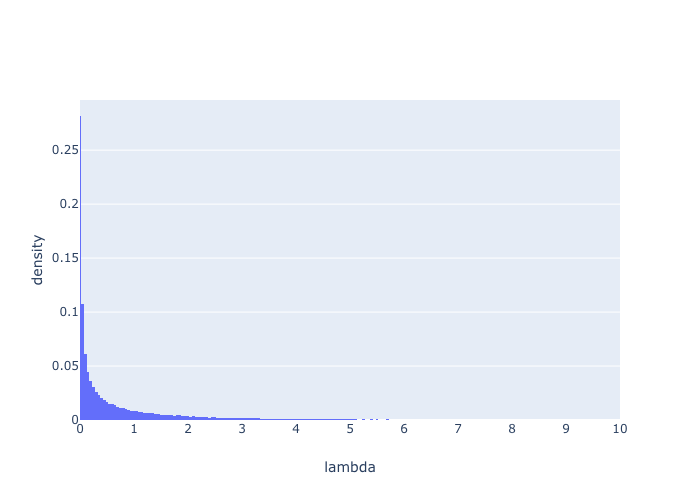

In [5]:
Image(filename='../images/histogram-figure-1.png')

## Two Histograms

In [6]:
# Bootstrap
first_list = []
second_list = []
for i in np.arange(10000):
    first = np.mean(churn.sample(len(churn), replace=True).loc[:, 'avg_distance'])
    second = np.mean(non_churn.sample(len(non_churn), replace=True).loc[:, 'avg_distance'])
    first_list.append(first)
    second_list.append(second)

In [7]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=first_list,
                           histnorm='probability',
                           name='churned',
                           marker_color='#EB89B5'))
fig.add_trace(go.Histogram(x=second_list,
                           histnorm='probability',
                           name='non_churned',
                           marker_color='#330C73'))

# Layout
fig.update_layout(title='',
                  barmode='overlay',
                  xaxis_title='avg_distance',
                  yaxis_title='probability')

fig.update_traces(opacity=0.75)

fig.show()

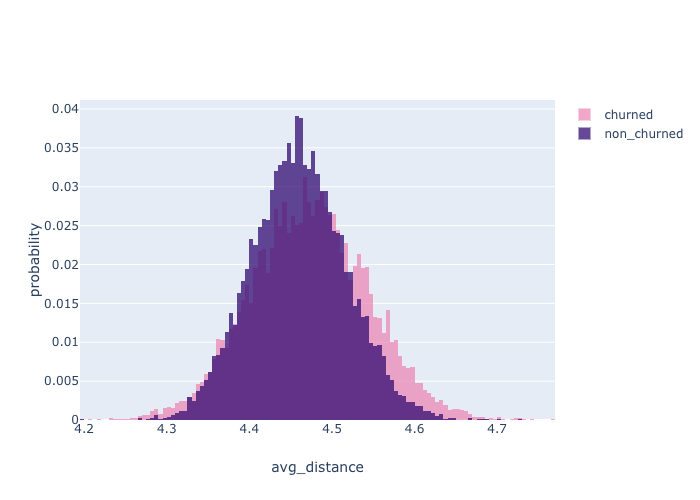

In [8]:
Image(filename='../images/histogram-figure-2.png')